In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')
drive.mount("/content/gdrive")
uploaded = files.upload()


Mounted at /content/drive
Mounted at /content/gdrive


Saving dataset.csv to dataset.csv


In [ ]:
fish_data = pd.read_csv("dataset.csv")
fish_data.shape

dataset = fish_data.copy()
dataset.tail()

Month    Fish  Avarage_Wind_Speed  Doller_Rate  Fuel_Price  \
100313      8  Salaya                 9.1       245.25       277.0   
100314      5  Salaya                13.5       161.66       225.0   
100315      5   Paraw                 9.9       204.45       453.0   
100316      5   Thora                10.1       361.01       385.0   
100317      2  Salaya                 7.0       212.45       191.0   

        Current_Price  
100313        2111.83  
100314        1251.13  
100315        1115.48  
100316        1479.41  
100317         441.23

In [ ]:
dataset.isna().sum()

Month                 0
Fish                  0
Avarage_Wind_Speed    0
Doller_Rate           0
Fuel_Price            0
Current_Price         0
dtype: int64

In [ ]:
# dataset['Fish'] = dataset['Fish'].map({1: "Hurulla", 2:"Balaya", 3:"Salaya", 4:"Kelawalla", 5:"Thora", 6:"Paraw"})
dataset['Fish'].replace(["Hurulla", "Balaya", "Salaya", "Kelawalla", "Thora", "Paraw"], [0, 1, 2, 3, 4, 5], inplace=True)

# dataset = pd.get_dummies(dataset, columns=['Fish'], prefix='', prefix_sep='')
dataset.tail()

Month  Fish  Avarage_Wind_Speed  Doller_Rate  Fuel_Price  \
100313      8     2                 9.1       245.25       277.0   
100314      5     2                13.5       161.66       225.0   
100315      5     5                 9.9       204.45       453.0   
100316      5     4                10.1       361.01       385.0   
100317      2     2                 7.0       212.45       191.0   

        Current_Price  
100313        2111.83  
100314        1251.13  
100315        1115.48  
100316        1479.41  
100317         441.23

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

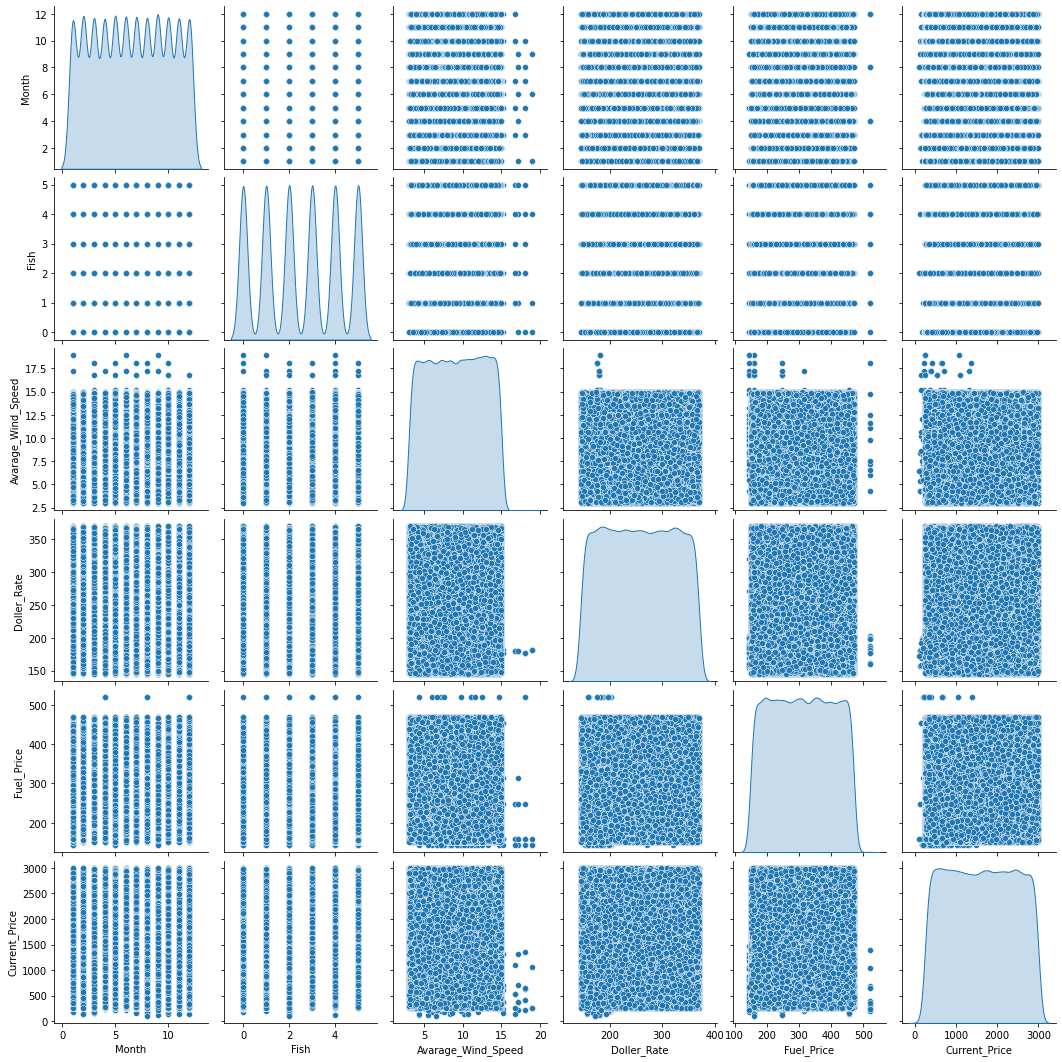

In [ ]:
sns.pairplot(train_dataset[['Month', 'Fish', 'Avarage_Wind_Speed', 'Doller_Rate','Fuel_Price', 'Current_Price']], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

count         mean         std    min       25%  \
Month               80254.0     6.503701    3.451136    1.0    4.0000   
Fish                80254.0     2.502592    1.707284    0.0    1.0000   
Avarage_Wind_Speed  80254.0     9.041006    3.475687    3.0    6.0000   
Doller_Rate         80254.0   257.215689   64.874553  145.0  200.7700   
Fuel_Price          80254.0   309.897980   92.794326  144.0  230.0000   
Current_Price       80254.0  1619.475708  793.780194  110.8  927.5275   

                        50%        75%      max  
Month                  7.00     9.0000    12.00  
Fish                   3.00     4.0000     5.00  
Avarage_Wind_Speed     9.10    12.1000    18.90  
Doller_Rate          257.03   313.5875   370.00  
Fuel_Price           310.00   390.0000   520.00  
Current_Price       1621.18  2307.7975  2999.99

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Current_Price')
test_labels = test_features.pop('Current_Price')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

mean         std
Month                  6.503701    3.451136
Fish                   2.502592    1.707284
Avarage_Wind_Speed     9.041006    3.475687
Doller_Rate          257.215689   64.874553
Fuel_Price           309.897980   92.794326
Current_Price       1619.475708  793.780194

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)



2.8.2


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.asarray(train_features).astype('float32'))
print(normalizer.mean.numpy())

[[  6.504   2.503   9.041 257.215 309.898]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  1.    3.    5.3 326.7 152. ]]

Normalized: [[-1.59  0.29 -1.08  1.07 -1.7 ]]


**Predictive Model Using Wind Speed (NO DNN | 1 input)**

In [ ]:
price_model_ws = np.array(train_features['Avarage_Wind_Speed'])

price_model_ws_normalizer = layers.Normalization(input_shape=[1,], axis=None)
price_model_ws_normalizer.adapt(price_model_ws)

In [ ]:
wind_speed_model = tf.keras.Sequential([
    price_model_ws_normalizer,
    layers.Dense(units=1)
])

wind_speed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
wind_speed_model.predict(price_model_ws[:10])

array([[-0.125],
       [-0.118],
       [-0.145],
       [ 0.132],
       [ 0.052],
       [-0.065],
       [ 0.029],
       [ 0.119],
       [ 0.192],
       [ 0.166]], dtype=float32)

In [ ]:
wind_speed_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = wind_speed_model.fit(
    train_features['Avarage_Wind_Speed'],
    train_labels,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
2007/2007 [==============================] - 4s 2ms/step - loss: 1519.8811 - val_loss: 1416.1880
Epoch 2/100
2007/2007 [==============================] - 3s 2ms/step - loss: 1322.6949 - val_loss: 1228.5156
Epoch 3/100
2007/2007 [==============================] - 3s 2ms/step - loss: 1152.7876 - val_loss: 1073.9810
Epoch 4/100
2007/2007 [==============================] - 3s 1ms/step - loss: 1014.9275 - val_loss: 949.5355
Epoch 5/100
2007/2007 [==============================] - 3s 1ms/step - loss: 904.0818 - val_loss: 851.7062
Epoch 6/100
2007/2007 [==============================] - 3s 2ms/step - loss: 819.5256 - val_loss: 779.4124
Epoch 7/100
2007/2007 [==============================] - 3s 1ms/step - loss: 759.6501 - val_loss: 730.8043
Epoch 8/100
2007/2007 [==============================] - 3s 2ms/step - loss: 721.4648 - val_loss: 701.9399
Epoch 9/100
2007/2007 [==============================] - 3s 2ms/step - loss: 701.1138 - val_loss: 688.4544
Epoch 10/100
2007/2007 [======

## Regression with a deep neural network (DNN)



In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Price]')
  plt.legend()
  plt.grid(True)

In [ ]:
dnn_price_model = build_and_compile_model(normalizer)
dnn_price_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                384       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,620
Trainable params: 4,609
Non-trainable params: 11
_________________________________________________________________


In [ ]:
%%time
history = dnn_price_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=100, verbose=0)

CPU times: user 5min 44s, sys: 26.4 s, total: 6min 10s
Wall time: 4min 54s


In [ ]:
plot_loss(history)

**Test Results**

In [ ]:
test_results = {}

test_results['dnn_model'] = dnn_price_model.evaluate(test_features, test_labels)

627/627 [==============================] - 1s 2ms/step - loss: 692.6118


**Predict**

In [ ]:
test_predictions = dnn_price_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Prices')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


**Error Distrubution**

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

**Save Model**

In [ ]:
dnn_price_model.save('dnn_model.h5')

In [ ]:
import tensorflow as tf

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(dnn_price_model)

tflite_model = converter.convert()



with open("Fish_predict_model.tflite", 'wb') as f:

  f.write(tflite_model)